In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Bitcoin

In [2]:
df = pd.read_csv('Bitcoin Historical Data.csv')
df = df.sort_index(ascending=False)
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4,28/05/2024,"68,366.00","69,428.30","69,560.70","67,299.90",71.39K,-1.53%
3,29/05/2024,"67,635.80","68,366.20","68,897.60","67,143.20",52.13K,-1.07%
2,30/05/2024,"68,354.70","67,631.30","69,504.70","67,138.40",66.84K,1.06%
1,31/05/2024,"67,530.10","68,352.30","69,018.20","66,676.80",61.51K,-1.21%
0,01/06/2024,"67,760.80","67,533.90","67,861.00","67,449.60",19.01K,0.34%


In [3]:
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '').astype(float)

In [4]:
# Chuyển đổi cột ngày thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Chuyển đổi cột ngày trở lại thành chuỗi với định dạng "%m/%d/%Y"
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

print(df)


            Date    Price     Open     High      Low    Vol. Change %
4110  03/01/2013     34.5     33.4     34.9     32.9  39.79K    3.36%
4109  03/02/2013     34.3     34.5     34.8     33.2  36.66K   -0.72%
4108  03/03/2013     34.5     34.3     34.5     33.8  12.53K    0.73%
4107  03/04/2013     36.2     34.5     36.7     34.2  46.77K    4.78%
4106  03/05/2013     40.3     36.2     40.7     36.2  85.43K   11.56%
...          ...      ...      ...      ...      ...     ...      ...
4     05/28/2024  68366.0  69428.3  69560.7  67299.9  71.39K   -1.53%
3     05/29/2024  67635.8  68366.2  68897.6  67143.2  52.13K   -1.07%
2     05/30/2024  68354.7  67631.3  69504.7  67138.4  66.84K    1.06%
1     05/31/2024  67530.1  68352.3  69018.2  66676.8  61.51K   -1.21%
0     06/01/2024  67760.8  67533.9  67861.0  67449.6  19.01K    0.34%

[4111 rows x 7 columns]


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

In [6]:
train_data = df[:round(len(df)*80/100)]
test_data = df[round(len(df)*80/100):]

print(train_data)
print(test_data)

           Date    Price     Open     High      Low     Vol. Change %
4110 2013-03-01     34.5     33.4     34.9     32.9   39.79K    3.36%
4109 2013-03-02     34.3     34.5     34.8     33.2   36.66K   -0.72%
4108 2013-03-03     34.5     34.3     34.5     33.8   12.53K    0.73%
4107 2013-03-04     36.2     34.5     36.7     34.2   46.77K    4.78%
4106 2013-03-05     40.3     36.2     40.7     36.2   85.43K   11.56%
...         ...      ...      ...      ...      ...      ...      ...
826  2022-02-26  39115.5  39221.6  40094.5  38639.1   41.55K   -0.24%
825  2022-02-27  37689.1  39116.6  39838.5  37062.3   66.14K   -3.65%
824  2022-02-28  43188.2  37707.2  43977.8  37458.9  108.07K   14.59%
823  2022-03-01  44420.3  43187.2  44900.5  42876.6   90.67K    2.85%
822  2022-03-02  43912.8  44420.3  45294.2  43361.3   80.82K   -1.14%

[3289 rows x 7 columns]
          Date    Price     Open     High      Low    Vol. Change %
821 2022-03-03  42463.0  43912.8  44077.2  41840.8  74.11K   -3.30%

In [7]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [8]:
train_size = round(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

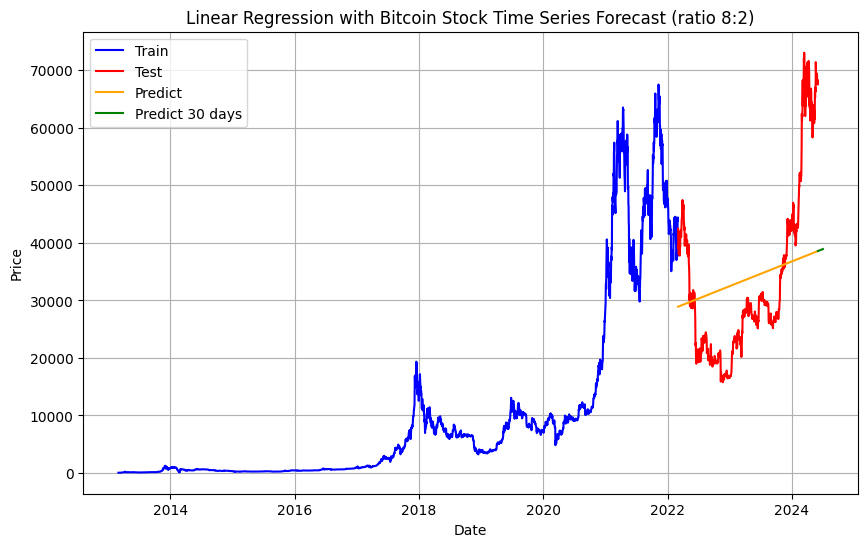

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10,6))

plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Predict')

# Predict prices for the next 30 days
last_date = df['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
plt.plot(next_30_days, y_next_30_days, linestyle='-', color='g', label='Predict 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression with Bitcoin Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 13115.779656461882
Testing MAPE: 0.35419973996145715
Testing MAE: 10753.37789111754


## NASDAQ

In [12]:
df = pd.read_csv('NASDAQ Composite Historical Data.csv')
df = df.sort_index(ascending=False)
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4,24/05/2024,"16,920.79","16,786.79","16,947.79","16,771.58",953.61M,1.10%
3,28/05/2024,"17,019.88","16,988.31","17,032.65","16,917.51",1.10B,0.59%
2,29/05/2024,"16,920.58","16,879.35","16,989.60","16,873.97",1.15B,-0.58%
1,30/05/2024,"16,737.08","16,878.63","16,900.46","16,690.36",1.11B,-1.08%
0,31/05/2024,"16,735.02","16,771.90","16,789.27","16,445.54",1.81B,-0.01%


In [13]:
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '').astype(float)

In [14]:
# Chuyển đổi cột ngày thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Chuyển đổi cột ngày trở lại thành chuỗi với định dạng "%m/%d/%Y"
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

print(df)

            Date     Price      Open      High       Low     Vol. Change %
2832  03/01/2013   3169.74   3143.54   3171.50   3129.40  431.39M    0.30%
2831  03/04/2013   3182.03   3159.46   3182.27   3154.79  397.77M    0.39%
2830  03/05/2013   3224.13   3200.38   3227.31   3200.27  418.69M    1.32%
2829  03/06/2013   3222.37   3233.31   3233.44   3217.67  377.54M   -0.05%
2828  03/07/2013   3232.09   3224.50   3235.10   3221.47  365.78M    0.30%
...          ...       ...       ...       ...       ...      ...      ...
4     05/24/2024  16920.79  16786.79  16947.79  16771.58  953.61M    1.10%
3     05/28/2024  17019.88  16988.31  17032.65  16917.51    1.10B    0.59%
2     05/29/2024  16920.58  16879.35  16989.60  16873.97    1.15B   -0.58%
1     05/30/2024  16737.08  16878.63  16900.46  16690.36    1.11B   -1.08%
0     05/31/2024  16735.02  16771.90  16789.27  16445.54    1.81B   -0.01%

[2833 rows x 7 columns]


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

In [16]:
train_data = df[:round(len(df)*80/100)]
test_data = df[round(len(df)*80/100):]

print(train_data)
print(test_data)

           Date     Price      Open      High       Low     Vol. Change %
2832 2013-03-01   3169.74   3143.54   3171.50   3129.40  431.39M    0.30%
2831 2013-03-04   3182.03   3159.46   3182.27   3154.79  397.77M    0.39%
2830 2013-03-05   3224.13   3200.38   3227.31   3200.27  418.69M    1.32%
2829 2013-03-06   3222.37   3233.31   3233.44   3217.67  377.54M   -0.05%
2828 2013-03-07   3232.09   3224.50   3235.10   3221.47  365.78M    0.30%
...         ...       ...       ...       ...       ...      ...      ...
571  2022-02-22  13381.52  13424.36  13618.71  13249.65    1.02B   -1.23%
570  2022-02-23  13037.49  13511.75  13533.78  13032.17  944.40M   -2.57%
569  2022-02-24  13473.58  12587.88  13486.11  12587.88    1.38B    3.34%
568  2022-02-25  13694.62  13485.26  13696.86  13358.29  978.45M    1.64%
567  2022-02-28  13751.40  13570.83  13810.64  13549.90    1.39B    0.41%

[2266 rows x 7 columns]
          Date     Price      Open      High       Low     Vol. Change %
566 2022-03-01

In [17]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [18]:
train_size = round(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

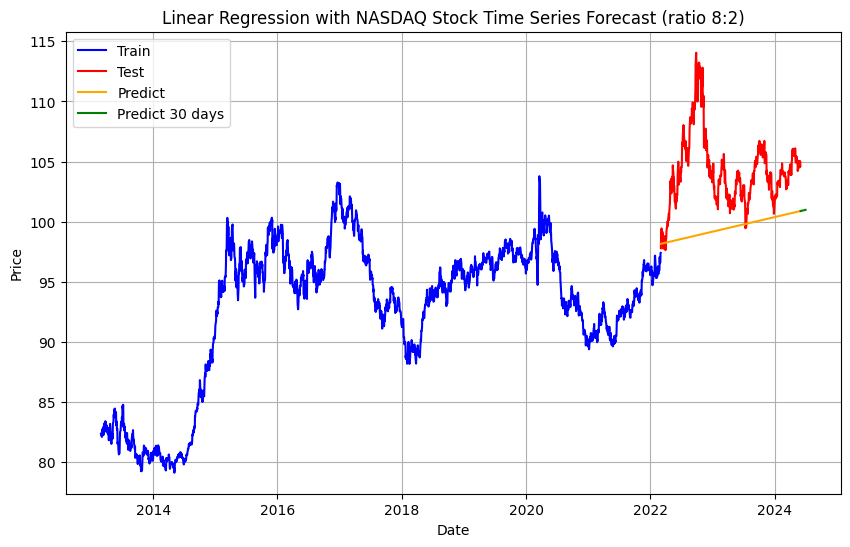

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10,6))

plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Predict')

# Predict prices for the next 30 days
last_date = df['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
plt.plot(next_30_days, y_next_30_days, linestyle='-', color='g', label='Predict 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression with NASDAQ Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 1575.341960386097
Testing MAPE: 0.11029555608338262
Testing MAE: 1338.098936405015


## USD

In [22]:
df = pd.read_csv('US Dollar Index Futures Historical Data.csv')
df = df.sort_index(ascending=False)
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4,27/05/2024,104.638,104.645,104.670,104.485,3.09K,0.00%
3,28/05/2024,104.539,104.490,104.560,104.260,11.02K,-0.09%
2,29/05/2024,105.034,104.590,105.085,104.515,17.66K,0.47%
1,30/05/2024,104.658,105.095,105.135,104.575,17.83K,-0.36%
0,31/05/2024,104.627,104.730,104.850,104.310,13.90K,-0.03%


In [23]:
# Chuyển đổi cột ngày thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Chuyển đổi cột ngày trở lại thành chuỗi với định dạng "%m/%d/%Y"
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

print(df)


            Date    Price     Open     High      Low    Vol. Change %
2906  03/01/2013   82.358   82.010   82.580   81.850  34.83K    0.43%
2905  03/04/2013   82.255   82.355   82.530   82.230  19.76K   -0.13%
2904  03/05/2013   82.147   82.210   82.300   81.955  25.02K   -0.13%
2903  03/06/2013   82.507   82.020   82.640   81.975  26.04K    0.44%
2902  03/07/2013   82.123   82.615   82.620   81.995  35.17K   -0.47%
...          ...      ...      ...      ...      ...     ...      ...
4     05/27/2024  104.638  104.645  104.670  104.485   3.09K    0.00%
3     05/28/2024  104.539  104.490  104.560  104.260  11.02K   -0.09%
2     05/29/2024  105.034  104.590  105.085  104.515  17.66K    0.47%
1     05/30/2024  104.658  105.095  105.135  104.575  17.83K   -0.36%
0     05/31/2024  104.627  104.730  104.850  104.310  13.90K   -0.03%

[2907 rows x 7 columns]


In [24]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

In [25]:
train_data = df[:round(len(df)*80/100)]
test_data = df[round(len(df)*80/100):]

print(train_data)
print(test_data)

           Date   Price    Open    High     Low    Vol. Change %
2906 2013-03-01  82.358  82.010  82.580  81.850  34.83K    0.43%
2905 2013-03-04  82.255  82.355  82.530  82.230  19.76K   -0.13%
2904 2013-03-05  82.147  82.210  82.300  81.955  25.02K   -0.13%
2903 2013-03-06  82.507  82.020  82.640  81.975  26.04K    0.44%
2902 2013-03-07  82.123  82.615  82.620  81.995  35.17K   -0.47%
...         ...     ...     ...     ...     ...     ...      ...
585  2022-02-24  97.043  96.260  97.650  96.200   1.25K    0.98%
584  2022-02-25  96.544  96.900  97.150  96.450   0.92K   -0.51%
583  2022-02-28  96.619  97.300  97.315  96.540   0.67K    0.08%
582  2022-03-01  97.374  96.730  97.535  96.575   1.31K    0.78%
581  2022-03-02  97.404  97.350  97.820  97.290   1.34K    0.03%

[2326 rows x 7 columns]
          Date    Price     Open     High      Low    Vol. Change %
580 2022-03-03   97.793   97.475   97.935   97.455   0.85K    0.40%
579 2022-03-04   98.671   98.035   98.910   97.865   1.85K 

In [26]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [27]:
train_size = round(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

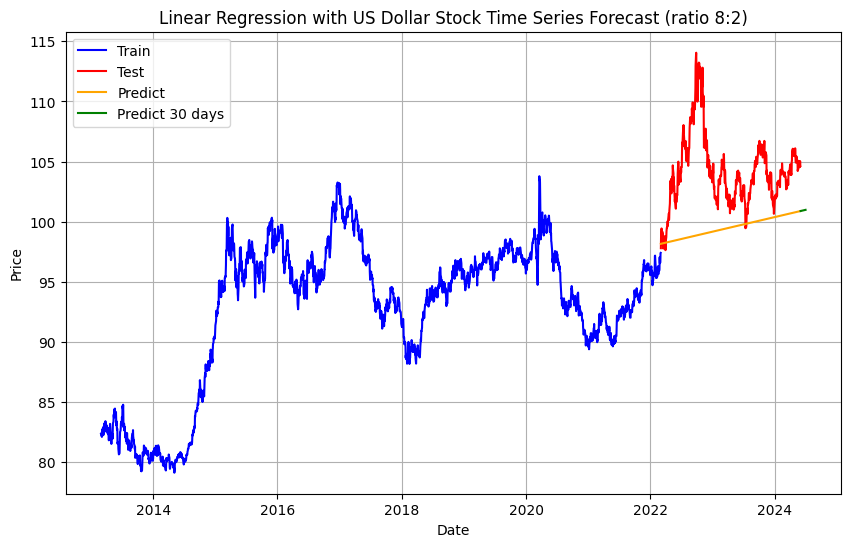

In [32]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10,6))

plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Predict')

# Predict prices for the next 30 days
last_date = df['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
plt.plot(next_30_days, y_next_30_days, linestyle='-', color='g', label='Predict 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression with US Dollar Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 5.5909979710723094
Testing MAPE: 0.044110834524135965
Testing MAE: 4.673803121658431
